# Tensorflow tutorial

### Μέρος 1 - Ο γράφος υπολογισμού. Υλοποίηση ενός απλού φίλτρου.

#### Γ.Σφήκας, Σεπ.2017


In [1]:
# Φορτώνουμε το tensorflow
import tensorflow as tf

# Κεντρική έννοια στο tensorflow είναι ο γράφος υπολογισμού (computational ή dataflow graph)
# Αρχικοποιούμε τον γράφο
tf.reset_default_graph()
# ..και δημιουργούμε μια συνεδρία (session) υπολογισμού του γράφου.
# Τυπικά θα χρειαστούμε μία μοναδική συνεδρία, ακόμα και για πολύπλοκα μοντέλα.
sess = tf.InteractiveSession()

Σε αυτό το tutorial θα υλοποιήσουμε ένα φίλτρο Sobel με το tensorflow.
Το φίλτρο μας, όπως και κάθε άλλος υπολογισμός που μπορούμε να κάνουμε στο tensorflow,
όπως για παράδειγμα ένα νευρωνικό δίκτυο, θα οριστεί σαν γράφος υπολογισμού.
Θα χρειαστούμε τα εξής στοιχεία για τον συγκεκριμένο γράφο υπολογισμού :

* Εικόνα εισόδου
* Αποτέλεσμα φίλτρου με οριζόντιο Sobel
* Αποτέλεσμα φίλτρου με κατακόρυφο Sobel
* Μέτρο Sobel



In [2]:
# Πρώτα θα ορίσουμε τους πυρήνες των φίλτρων. Αυτοί θα είναι σταθερές.
# Με το δεύτερο όρισμα ορίζουμε το όνομα του κάθε φίλτρου εσωτερικά στον γράφο (θα το δούμε μετά)
sobel_horizontal = tf.constant([ [-1., 0., 1.], [-2., 0., 2.], [-1., 0., 1.] ], name="sobel_horizontal")
sobel_vertical = tf.constant([ [-1., -2., -1.], [0., 0., 0.], [1., 2., 1.] ], name="sobel_vertical")
print sobel_horizontal, sobel_vertical


# Παρατηρείστε ότι οι παραπάνω σταθερές είναι τύπου Tensor.
# Τύπου Tensor (ελληνικά: τανυστής) είναι οι περισσότερες σταθερές και μεταβλητές στο tensorflow.

Tensor("sobel_horizontal:0", shape=(3, 3), dtype=float32) Tensor("sobel_vertical:0", shape=(3, 3), dtype=float32)


In [3]:
# Μπορούμε να επιβεβαιώσουμε το περιεχόμενο των σταθερών που ορίσαμε ως εξής.
print sobel_horizontal.eval()
print sobel_vertical.eval()

[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]
[[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]


In [6]:
# Οι όροι που πρέπει να δοθούν σαν είσοδοι στον γράφο, και ορίζονται γενικά από τον χρήστη,
# στο tensorflow ονομάζονται placeholders . Και οι placeholders είναι τανυστές.
# Ορίζοντας ένα placeholder 'υποσχόμαστε' ότι θα ορίσουμε τα ακριβή περιεχόμενα του κάποια στιγμή στη συνέχεια.

input_image = tf.placeholder(tf.float32, shape=[None, 512, 512], name="input_image")
print input_image

# Στην προκειμένη περίπτωση, ορίσαμε ότι θα καθορίσουμε μια εικόνα 512x512 σαν είσοδο στον υπολογιστικό γράφο.

Tensor("input_image_1:0", shape=(?, 512, 512), dtype=float32)


In [7]:
# Τώρα πρέπει να ορίσουμε τον τρόπο που θα συνδυαστεί η είσοδος με το κάθε φίλτρο.
# Για την ώρα, αγνοήστε τον πολύπλοκο τρόπο που πρέπει να δηλώσουμε τα ορίσματα.
sobel_horizontal_output =  tf.nn.conv2d(
    tf.reshape(input_image, [1, 512, 512, 1]), 
    tf.reshape(sobel_horizontal, [3, 3, 1, 1]), 
    strides=[1, 1, 1, 1], 
    padding="SAME",
    name = 'sobel_horizontal_output')
print sobel_horizontal_output

sobel_vertical_output =  tf.nn.conv2d(
    tf.reshape(input_image, [1, 512, 512, 1]), 
    tf.reshape(sobel_vertical, [3, 3, 1, 1]), 
    strides=[1, 1, 1, 1], 
    padding="SAME",
    name = 'sobel_vertical_output')
print sobel_vertical_output



Tensor("sobel_horizontal_output:0", shape=(1, 512, 512, 1), dtype=float32)
Tensor("sobel_vertical_output:0", shape=(1, 512, 512, 1), dtype=float32)


In [9]:
# Θα ορίσουμε, τέλος, το μέτρο Sobel
sobel_mag = tf.add(tf.abs(sobel_horizontal_output), tf.abs(sobel_vertical_output), name = "sobel_mag")
print sobel_mag

Tensor("sobel_mag_1:0", shape=(1, 512, 512, 1), dtype=float32)


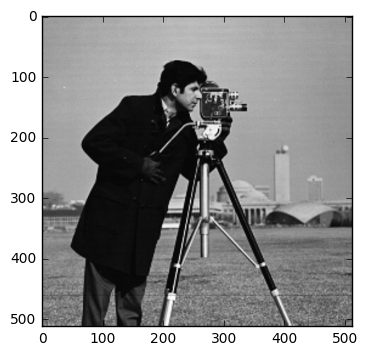

In [11]:
# Αφού τελειώσαμε με τον ορισμό του υπολογιστικού γράφου,
# είμαστε σχεδόν έτοιμοι να 'τρέξουμε' τον γράφο, δηλαδή να τον χρησιμοποιήσουμε για τους υπολογισμούς που ορίσαμε.
#
# Το μόνο που μένει πριν τρέξει είναι να δώσουμε τιμή στον placeholder που ορίσαμε παραπάνω.
import skimage.data as fixtures
my_input_image = fixtures.camera()
import matplotlib.pyplot as plt
plt.imshow(my_input_image, cmap="gray") # (επιστρέφει όρισμα το οποίο μπορούμε να αγνοήσουμε)
plt.show()



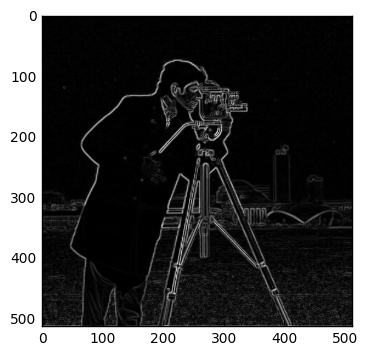

In [12]:
import numpy as np
cameraman_filtered = sess.run(sobel_mag, feed_dict={input_image: np.reshape(my_input_image, [1, 512, 512])})
plt.imshow(np.reshape(cameraman_filtered, [512, 512]), cmap="gray") # (επιστρέφει όρισμα το οποίο μπορούμε να αγνοήσουμε)
plt.show()


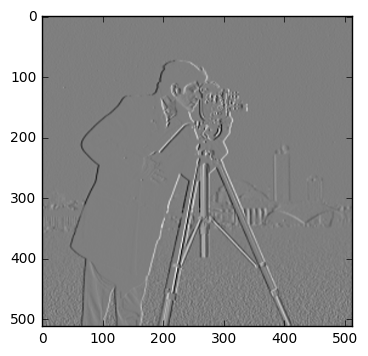

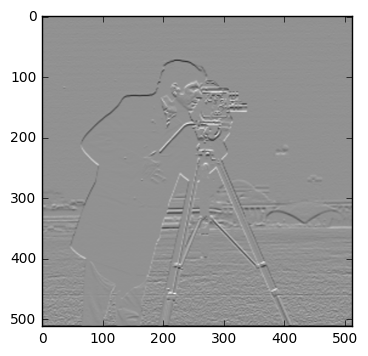

In [13]:
# Με τον ίδιο τρόπο, μπορούμε να ζητήσουμε να υπολογιστεί οποιοσδήποτε άλλος κόμβος του γράφου.
cameraman_filtered_horizontal = sess.run(sobel_horizontal_output, feed_dict={input_image: np.reshape(my_input_image, [1, 512, 512])})
plt.imshow(np.reshape(cameraman_filtered_horizontal, [512, 512]), cmap="gray") # (επιστρέφει όρισμα το οποίο μπορούμε να αγνοήσουμε)
plt.show()

cameraman_filtered_vertical = sess.run(sobel_vertical_output, feed_dict={input_image: np.reshape(my_input_image, [1, 512, 512])})
plt.imshow(np.reshape(cameraman_filtered_vertical, [512, 512]), cmap="gray") # (επιστρέφει όρισμα το οποίο μπορούμε να αγνοήσουμε)
plt.show()


## Ασκήσεις

1. (*) Υλοποιήστε το Λαπλασιάνο φίλτρο χρησιμοποιώντας το tensorflow. 
2. (*) Να αλλάξετε τον κώδικα ώστε η εικόνα να δίνεται από τον χρήστη από τον δίσκο και να γράφεται στον δίσκο. Η είσοδος και η έξοδος να δίνονται σαν ορίσματα από γραμμή έντολής.
3. (***) Χρησιμοποιήστε την υλοποίηση του Tensorflow για javascript (https://github.com/transcranial/keras-js) για να κατασκευάσετε ένα απλό φίλτρο της επιλογής σας σαν in-browser εφαρμογή.